In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
import numpy as np

# Set graph styles

In [2]:
plt.style.use('Solarize_Light2')
# # plt.style.use('seaborn-poster')
# plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Merriweather'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
# plt.rcParams['xtick.color']='black'
# plt.rcParams['ytick.color']='black'
# plt.rcdefaults()

# Import, sift and clean data 

In [3]:
df = pd.read_csv('homicide-data.csv', encoding = "latin1")

In [4]:
df_philly = df[df.city == 'Philadelphia']

In [5]:
#Remove 'other' race
df_philly = df_philly[df_philly.victim_race!='Other']

In [6]:
# make a new coloumn that contains only the year and strip out incomplete data (2017)
df_philly['year']=df_philly.reported_date.astype(str)
df_philly['year']=df_philly.year.str.extract('(\d\d\d\d)').astype(int)
df_philly= df_philly[df_philly.year != 2017]

In [7]:
df_philly.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,year
40056,Phi-000001,20160904,LEWIS,MAULUI,Black,45,Male,Philadelphia,PA,39.996143,-75.113598,Closed by arrest,2016
40057,Phi-000002,20161224,ALEXANDER,JAQUAN,Black,17,Male,Philadelphia,PA,39.944537,-75.228694,Closed by arrest,2016
40058,Phi-000003,20150730,DZIKOWSKI,STEPHANIE,White,22,Female,Philadelphia,PA,39.986769,-75.110085,Closed by arrest,2015
40059,Phi-000004,20160703,CLARK,CHARLES,Black,37,Male,Philadelphia,PA,39.998566,-75.109180,Closed by arrest,2016
40060,Phi-000005,20160820,BOYER,LEONARD III,Black,25,Male,Philadelphia,PA,39.964808,-75.157215,Closed by arrest,2016


#  Analysis

In [8]:
closed = df_philly[df_philly.disposition == 'Closed by arrest'].uid.count()
no_arrest = df_philly[df_philly.disposition != 'Closed by arrest'].uid.count()
total = df_philly.uid.count()
without_arrest = no_arrest/total * 100
close_rate = closed/total * 100
print('Philadelphia has had around {} murders from 2007-2016.'.format(total))
print('Philly P.D. closed {}% of those cases, while {}% of them resulted in no arrest'.format(round(close_rate), round(without_arrest)))

Philadelphia has had around 3035 murders from 2007-2016.
Philly P.D. closed 55.0% of those cases, while 45.0% of them resulted in no arrest


# Graphs! 

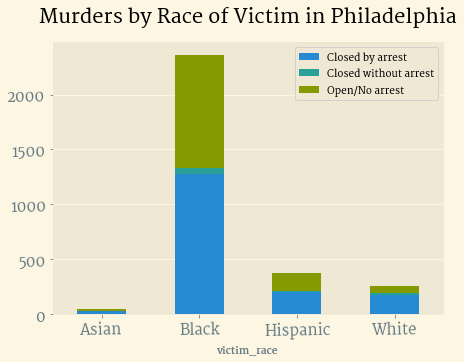

In [205]:
race = df_philly.groupby('victim_race')['disposition'].value_counts().unstack().reset_index().fillna(0)
ax_race = race.plot(kind='bar', x='victim_race', stacked=True,figsize=(7,5))
ax_race.yaxis.label.set_visible(False)
ax_race.set_title("Murders by Race of Victim in Philadelphia", pad = 20)
ax_race.title.set_fontsize(20)
ax_race.legend(fontsize =10)
ax_race.tick_params(labelrotation=1)
ax_race.grid(False, axis='x')
plt.savefig('murderbyrace.svg')

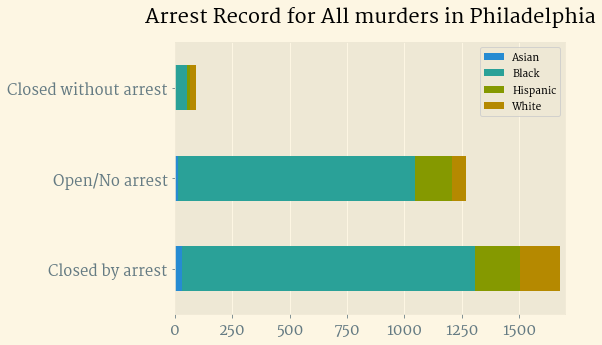

In [110]:
dispo = df_philly.groupby('disposition')['victim_race'].value_counts().unstack().reset_index().fillna(0)
dispo = dispo.sort_values(by='Black', ascending=False)
ax_dispo= dispo.plot(kind='barh', x='disposition', stacked=True, figsize=(7,5))
ax_dispo.yaxis.label.set_visible(False)
ax_dispo.set_xlim(0,1700)
ax_dispo.set_title("Arrest Record for All murders in Philadelphia", pad = 20)
ax_dispo.title.set_fontsize(20)
ax_dispo.legend(fontsize =10)
ax_dispo.grid(False, axis='y')

In [195]:
# # color_dict = {
# #     'Closed without arrest': '#268bd2',
# #     'Closed by arrest': '#2aa198',
# #     'Open/No arrest': '#859900'
# # }
# # bar_colors = [color_dict[dispo] for dispo in df_philly.disposition]

# bar_colors = ['#268bd2', '#2aa198', '#859900']

# df_philly[df_philly.victim_race == "Black"].sort_values(by='year').groupby('year').disposition.value_counts().plot(kind='barh', figsize=(10,15), color=bar_colors)


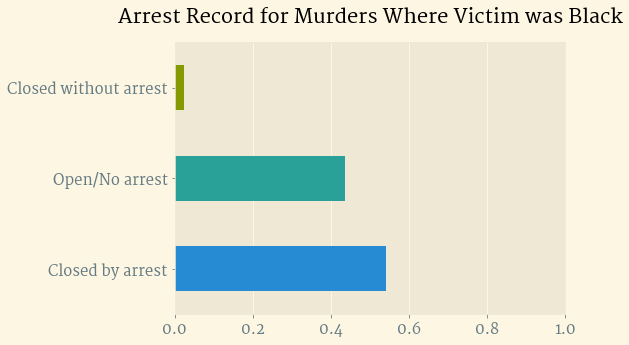

In [162]:
ax_black = df_philly[df_philly.victim_race == "Black"].disposition.value_counts(normalize=True).plot(kind='barh', figsize=(7,5))
ax_black.set_xlim(0,1)
ax_black.set_title("Arrest Record for Murders Where Victim was Black", pad = 20)
ax_black.title.set_fontsize(20)
ax_black.grid(False, axis='y')

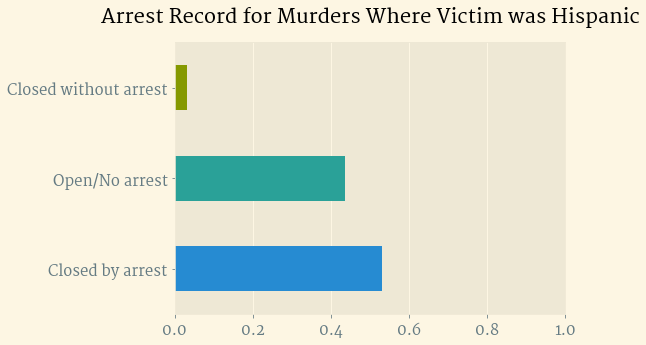

In [161]:
ax_hisp = df_philly[df_philly.victim_race == "Hispanic"].disposition.value_counts(normalize=True).plot(kind='barh', figsize=(7,5))
ax_hisp.set_xlim(0,1)
ax_hisp.set_title("Arrest Record for Murders Where Victim was Hispanic", pad = 20)
ax_hisp.title.set_fontsize(20)
ax_hisp.grid(False, axis='y')

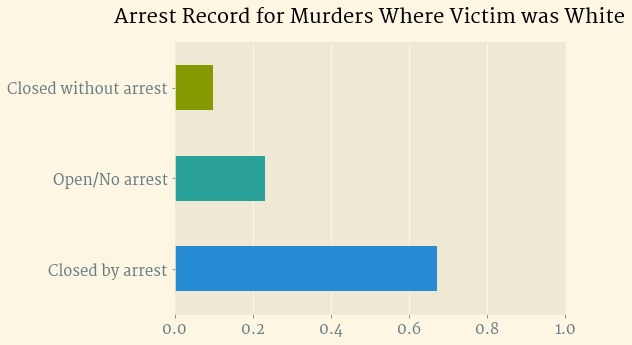

In [160]:
ax_white = df_philly[df_philly.victim_race == "White"].disposition.value_counts(normalize=True).plot(kind='barh', figsize=(7,5))
ax_white.set_xlim(0,1)
ax_white.set_title("Arrest Record for Murders Where Victim was White", pad = 20)
ax_white.title.set_fontsize(20)
ax_white.grid(False, axis='y')

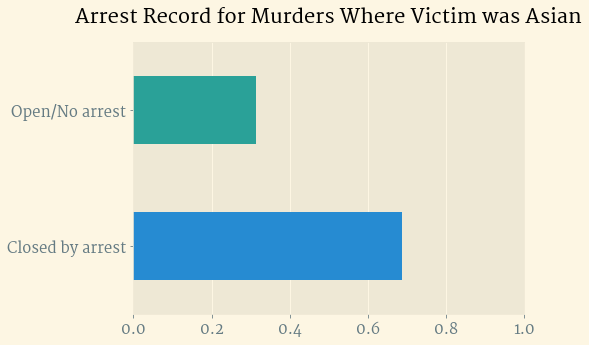

In [159]:
ax_asian = df_philly[df_philly.victim_race == "Asian"].disposition.value_counts(normalize=True).plot(kind='barh', figsize=(7,5))
ax_asian.set_xlim(0,1)
ax_asian.set_title("Arrest Record for Murders Where Victim was Asian", pad = 20)
ax_asian.title.set_fontsize(20)
ax_asian.grid(False, axis='y')

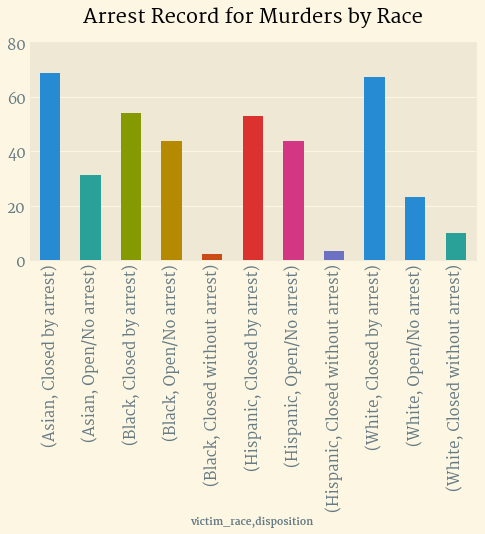

In [201]:
record = df_philly.groupby('victim_race').disposition.value_counts(normalize=True)*100
ax_rec = record.plot(kind='bar', x=['victim_race','disposition'], figsize=(8,4), ylim=(0,80))
ax_rec.set_title("Arrest Record for Murders by Race", pad = 20)
ax_rec.title.set_fontsize(20)
ax_rec.grid(False, axis='x')
ax_rec.tick_params(axis='both', length=0)
plt.savefig('records.png')

In [202]:
df_philly.groupby('victim_race').disposition.value_counts(normalize=True)*100

victim_race  disposition          
Asian        Closed by arrest         68.750000
             Open/No arrest           31.250000
Black        Closed by arrest         53.986429
             Open/No arrest           43.681086
             Closed without arrest     2.332485
Hispanic     Closed by arrest         53.083110
             Open/No arrest           43.699732
             Closed without arrest     3.217158
White        Closed by arrest         67.187500
             Open/No arrest           23.046875
             Closed without arrest     9.765625
Name: disposition, dtype: float64

In [22]:
df_philly.year.max()

2016

In [23]:
df_philly.year.max()

2016

In [24]:
df_philly[df_philly.victim_race == 'Black'].sort_values(by='year').groupby('year')['uid'].count()

year
2007    304
2008    252
2009    234
2010    234
2011    267
2012    258
2013    193
2014    196
2015    206
2016    214
Name: uid, dtype: int64

In [ ]:
df.plot()

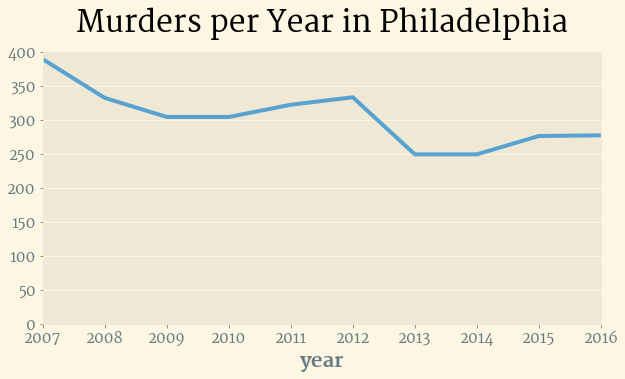

In [209]:
ax_year = df_philly.sort_values(by='year').groupby('year')['uid'].count().plot(kind='line',ylim=(0,400), xlim=(2007,2016), figsize=(10,5), alpha=0.75, lw=4)
ax_year.set_title("Murders per Year in Philadelphia", pad = 20)
ax_year.title.set_fontsize(30)
ax_year.xaxis.label.set_fontsize(20)
ax_year.grid(False, axis='x')
plt.savefig('murderperyear.svg')

# Definitely _Not_ a Map

Just a scatterplot of coordinates that looks surprisingly like Philadelphia 

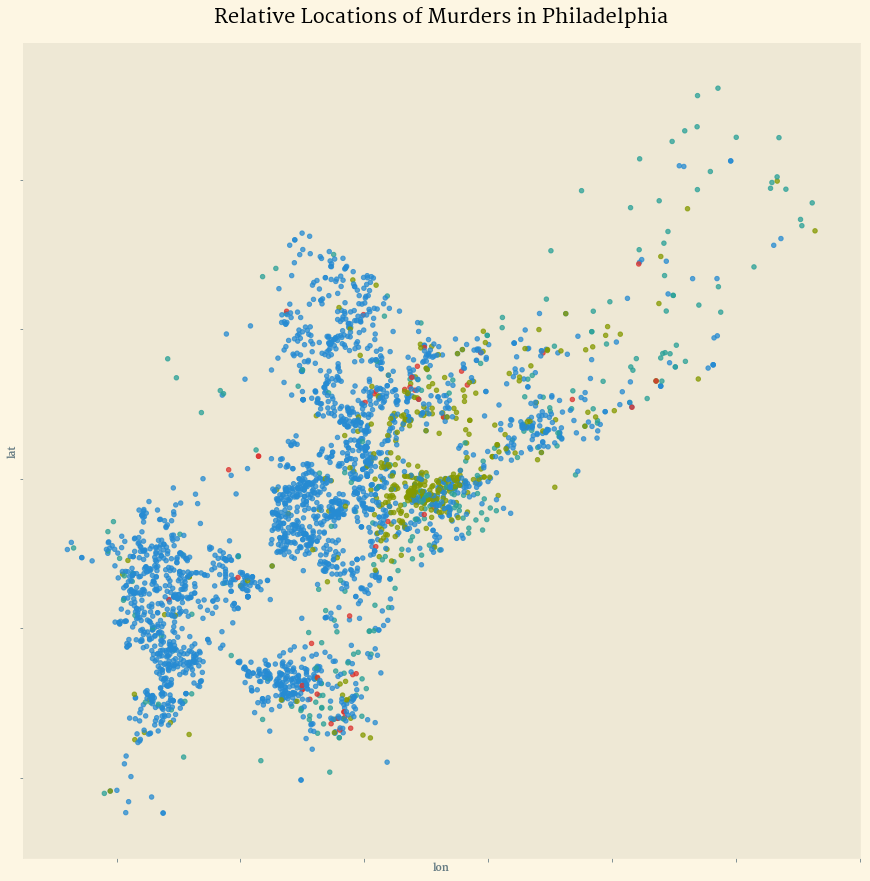

In [38]:
color_dict = {
    'Black': '#268bd2',
    'White': '#2aa198',
    'Hispanic': '#859900',
    'Asian': '#dc322f'
}
bar_colors = [color_dict[race] for race in df_philly.victim_race]

ax_loc = df_philly.plot.scatter(x='lon', y = 'lat', figsize =(15,15), color=bar_colors, alpha=0.75)
ax_loc.set_title("Relative Locations of Murders in Philadelphia", pad = 20)
ax_loc.title.set_fontsize(20)
ax_loc.tick_params(labelbottom=False, labelleft=False)
ax_loc.grid(False)
plt.savefig("graph-scatter.pdf")


## Make a chart that shows, by percentage, who gets their cases closed the most

In [167]:
# dispo

In [144]:
# total_as = dispo.Asian.sum()
# closed_as = dispo.Asian[0]
# open_as = dispo.Asian[2]
# open_perc_as = open_as/total_as * 100
# closed_perc_as = round(closed_as/total_as * 100, 2)

# total_bl = dispo.Black.sum()
# closed_bl = dispo.Black[0]
# open_bl = dispo.Black[2]
# open_perc_bl = open_bl/total_bl * 100
# closed_perc_bl = round(closed_bl/total_bl * 100, 2)


# total_wh = dispo.White.sum()
# closed_wh = dispo.White[0]
# open_wh = dispo.White[2]
# open_perc_wh = open_wh/total_wh * 100
# closed_perc_wh = round(closed_wh/total_wh * 100, 2)

# total_hi = dispo.Hispanic.sum()
# closed_hi = dispo.Hispanic[0]
# open_hi = dispo.Hispanic[2]
# open_perc_hi = open_hi/total_hi * 100
# closed_perc_hi = round(closed_hi/total_hi * 100, 2)

# dispo.loc[3] = ['percent closed', closed_perc_as, closed_perc_bl, closed_perc_hi, closed_perc_wh]
# dispo.loc[4] = ['percent open', open_perc_as, open_perc_bl, open_perc_hi, open_perc_wh]

In [165]:
# dispo.plot(x=)

In [163]:
# dispo_perc = df_philly.groupby('disposition')['victim_race'].value_counts().unstack().fillna(0)

In [164]:
# dispo_perc.reset_index()

In [ ]:
#just use normalize, dumbass

# Make DB for web app

In [9]:
import sqlite3
conn = sqlite3.connect("murder.db")
df_philly.to_sql('murder', conn)